In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau

In [2]:
def hidden_to_params(h, k=10, d=784):
    return (d+1) * h + (h+1) * k

def get_units_at_interp(n, k=10, d=784):
    # n k = (d+1) H + (H+1) K
    return np.ceil((n * k - k) / (d + 2)).astype(int)

## Network

In [6]:
#
algo = "relu_regressor"
dataset = "mnist"

# Read
df = pd.read_csv(f'./results/{dataset}/{dataset}_{algo}_results.csv')

# Define headers
train_error = 'train_01_error'
test_error = 'test_01_error'

# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'hidden_layer_dims'],
#     as_index=False,
# ).mean()
# df['n_parameters'] = df['n_parameters'].astype(int)

df.head(5)

,model,rep,n_train_samples,n_test_samples,save_path,hidden_layer_dims,n_epochs,learning_rate,batch_size,verbose,...,IRM_h*,ACTS_h*,entropy,rows_mean_L2,cols_mean_L1,cols_mean_L2,n_parameters,depth,width,generalization_gap
0,relu_regressor,0.0,4000.0,10000.0,/mnt/ssd3/ronan/pytorch,4.0,6000.0,0.01,32.0,0.0,...,2.0,3.0,6209.137247,0.176908,249.750000,7.901740,3190.0,1.0,4.0,0.00795
1,relu_regressor,0.0,4000.0,10000.0,/mnt/ssd3/ronan/pytorch,8.0,6000.0,0.01,32.0,0.0,...,5.0,21.0,16997.510053,0.302568,336.375000,7.490619,6370.0,1.0,8.0,0.04980
2,relu_regressor,0.0,4000.0,10000.0,/mnt/ssd3/ronan/pytorch,16.0,6000.0,0.01,32.0,0.0,...,8.0,60.0,24973.405725,0.373656,245.250000,4.790942,12730.0,1.0,16.0,0.10260
3,relu_regressor,0.0,4000.0,10000.0,/mnt/ssd3/ronan/pytorch,32.0,6000.0,0.01,32.0,0.0,...,18.0,254.0,34575.512726,0.431866,172.562500,3.150211,25450.0,1.0,32.0,0.18855
4,relu_regressor,0.0,4000.0,10000.0,/mnt/ssd3/ronan/pytorch,38.0,6000.0,0.01,32.0,0.0,...,21.0,253.0,33414.673302,0.415873,142.263158,2.582436,30220.0,1.0,38.0,0.21030


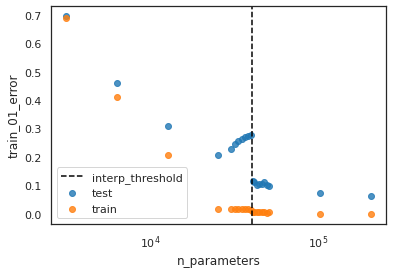

In [7]:
sns.set_style('white')
sns.set_context('notebook')

plot_df = df# [(df['hidden_layer_dims'] >= 38) & (df['hidden_layer_dims'] <= 64)]

fig, ax = plt.subplots(1, 1, sharex=True)

sns.regplot(
    data=plot_df, x='n_parameters', y=test_error, lowess=False,
    ax=ax, label='test', fit_reg=False, x_ci=90)
sns.regplot(
    data=plot_df, x='n_parameters', y=train_error, lowess=False,
    ax=ax, label='train', fit_reg=False, x_ci=90)

ax.axvline(10*df['n_train_samples'].iloc[0], ls='--', c='black', label='interp_threshold')
plt.xscale('log')
# plt.yscale('symlog')
plt.legend()
plt.show()

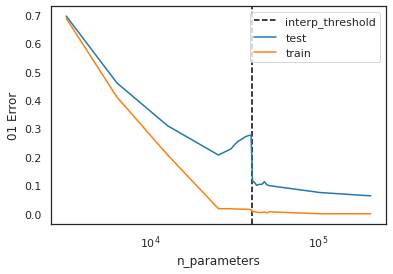

In [11]:
sns.set_style('white')
sns.set_context('notebook')

plot_df = df

fig, ax = plt.subplots(1, 1, sharex=True)

ax.axvline(10*df['n_train_samples'].iloc[0], ls='--', c='black', label='interp_threshold')

sns.lineplot(
    data=plot_df, x='n_parameters', y=test_error,
    ax=ax, label='test')
sns.lineplot(
    data=plot_df, x='n_parameters', y=train_error,
    ax=ax, label='train')

plt.xscale('log')
plt.ylabel('01 Error')
plt.legend()
plt.show()

In [12]:
corr_vars = [
    'generalization_gap',
    'n_parameters', 'depth', 'width', 'n_epochs',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
# for hidden_layer_dims in df['hidden_layer_dims'].unique():
# print(hidden_layer_dims)
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
# corr_df.to_csv('./results/dn_spearman_corrs.csv')

,generalization_gap,n_parameters,depth,width,n_epochs,IRM_L1,IRM_L2,n_regions,ACTS_L2,IRM_h*,ACTS_h*,entropy,rows_mean_L2,cols_mean_L1,cols_mean_L2
generalization_gap,1.000000,-0.259740,NaN,-0.259740,NaN,-0.377922,-0.387013,-0.257143,0.290909,-0.276223,-0.038961,-0.380519,-0.342857,-0.853247,-0.953247
n_parameters,-0.259740,1.000000,NaN,1.000000,NaN,0.883117,0.874026,0.979221,-0.951948,0.992839,0.706494,0.880519,0.858442,0.606494,0.372727
depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,-0.259740,1.000000,NaN,1.000000,NaN,0.883117,0.874026,0.979221,-0.951948,0.992839,0.706494,0.880519,0.858442,0.606494,0.372727
n_epochs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM_L1,-0.377922,0.883117,NaN,0.883117,NaN,1.000000,0.994805,0.893506,-0.925974,0.897725,0.620779,0.997403,0.980519,0.742857,0.503896
IRM_L2,-0.387013,0.874026,NaN,0.874026,NaN,0.994805,1.000000,0.880519,-0.910390,0.887301,0.607792,0.997403,0.983117,0.751948,0.514286
n_regions,-0.257143,0.979221,NaN,0.979221,NaN,0.893506,0.880519,1.000000,-0.975325,0.981764,0.727273,0.888312,0.876623,0.642857,0.407792
ACTS_L2,0.290909,-0.951948,NaN,-0.951948,NaN,-0.925974,-0.910390,-0.975325,1.000000,-0.962220,-0.702597,-0.915584,-0.903896,-0.671429,-0.433766
IRM_h*,-0.276223,0.992839,NaN,0.992839,NaN,0.897725,0.887301,0.981764,-0.962220,1.000000,0.708147,0.896422,0.874272,0.629319,0.393487


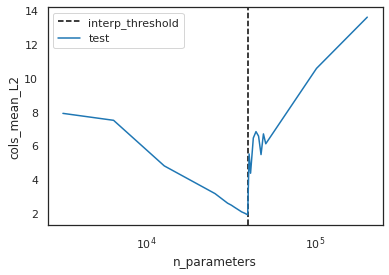

In [25]:
sns.set_style('white')
sns.set_context('notebook')

plot_df = df

fig, ax = plt.subplots(1, 1, sharex=True)

ax.axvline(10*df['n_train_samples'].iloc[0], ls='--', c='black', label='interp_threshold')

sns.lineplot(
    data=plot_df, x='n_parameters', y='cols_mean_L2',
    ax=ax, label='test')

plt.xscale('log')
plt.legend()
plt.show()

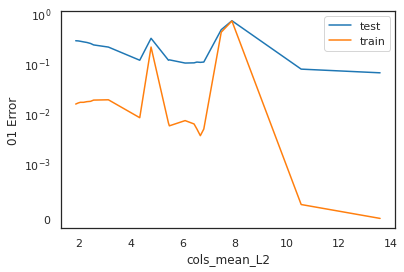

In [24]:
sns.set_style('white')
sns.set_context('notebook')

plot_df = df

fig, ax = plt.subplots(1, 1, sharex=True)

sns.lineplot(
    data=plot_df, x='cols_mean_L2', y=test_error,
    ax=ax, label='test')
sns.lineplot(
    data=plot_df, x='cols_mean_L2', y=train_error,
    ax=ax, label='train')

plt.ylabel('01 Error')
plt.yscale('symlog', linthresh=1e-3)
plt.legend()
plt.show()